# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Изучение общей информации

**Импортируем библиотеки:**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from datetime import datetime


pd.set_option('display.max_columns', None)

**Изучим общую информацию о датафрейме:**

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # Читаем csv-файл
data.head(10) # Выводим первые 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.tail(10) # Выводим последние 10 строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info() # Выводим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.describe() # Выводим описательные статистики данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

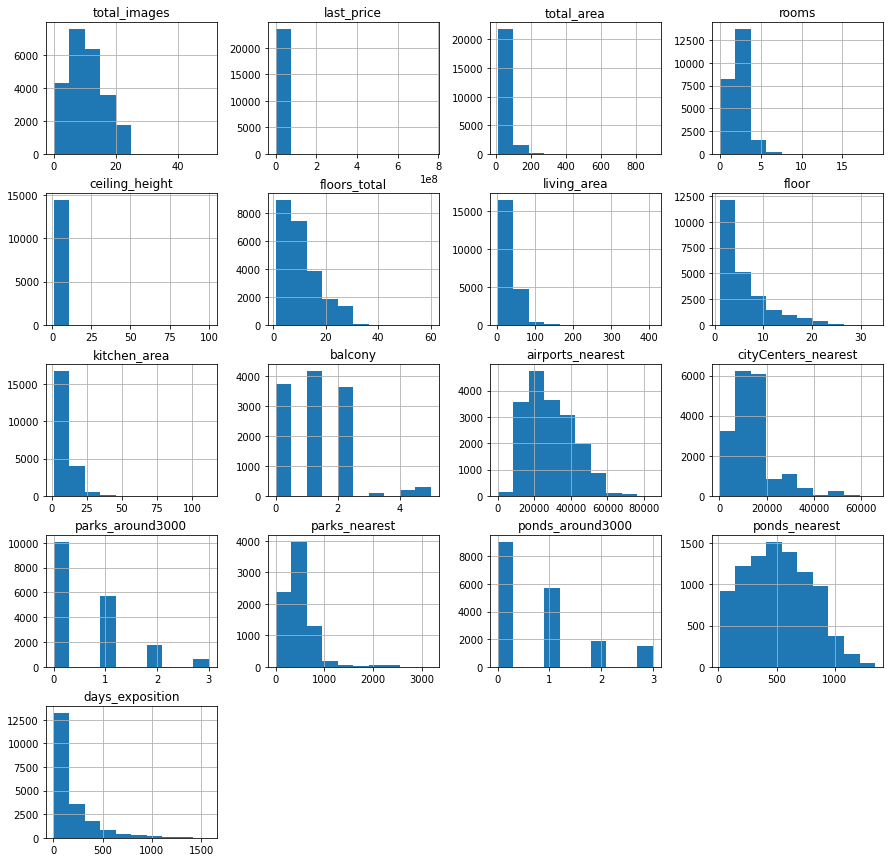

In [8]:
data.hist(figsize=(15, 15)) # Для наглядности строим гистограммы для всех числовых столбцов датафрейма

In [9]:
data.duplicated().sum() # Проверяем очевидные дубликаты (их нет)

0

**На данном этапе можем выделить следующие проблемы:**
- в данных очень много пропусков;
- данные трудночитаемы ввиду плохой группировки и стилистических ошибок в названиях столбцов;
- возможны неочевидные дубликаты в данных (разница в регистре или дате публикации), требующие более тщательной проверки.

### Предобработка данных

**2.0. В таблице всего 23699 строк. Однако, в некоторых из них есть пропуски. Изучим, в каких именно:**

In [10]:
data.isna().sum().sort_values(ascending=False) # Находим количество пропусков в каждом столбце

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**Как видим, пропуски есть практически во всех столбцах. Ознакомимся с ними подробнее, но сперва перегруппируем и переименуем столбцы для лучшего восприятия информации:**

In [11]:
data = data[[
    'locality_name',
    'rooms',
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'total_images',
    'floor',
    'floors_total',
    'is_apartment',
    'studio',
    'open_plan',
    'ceiling_height',
    'balcony',
    'cityCenters_nearest',
    'airports_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'days_exposition',
    'first_day_exposition'
]] # Группируем параметры 
data.columns = [
    'location',
    'rooms',
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'total_images',
    'floor',
    'floors_total',
    'apartment',
    'studio',
    'open_plan',
    'ceiling_height',
    'balcony',
    'city_centers_nearest',
    'airports_nearest',
    'parks_around_3km',
    'parks_nearest_m',
    'ponds_around_3km',
    'ponds_nearest_m',
    'exposition_first_day',
    'exposition_days',
] # Переименовываем столбцы
data.head(10) # Выводим первые 10 строк обновлённой таблицы

,location,rooms,last_price,total_area,living_area,kitchen_area,total_images,floor,floors_total,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_days
0,Санкт-Петербург,3,13000000.0,108.00,51.00,25.00,20,8,16.0,NaN,False,False,2.70,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,NaN,2019-03-07T00:00:00
1,посёлок Шушары,1,3350000.0,40.40,18.60,11.00,7,1,11.0,NaN,False,False,NaN,2.0,18603.0,12817.0,0.0,NaN,0.0,NaN,81.0,2018-12-04T00:00:00
2,Санкт-Петербург,2,5196000.0,56.00,34.30,8.30,10,4,5.0,NaN,False,False,NaN,0.0,13933.0,21741.0,1.0,90.0,2.0,574.0,558.0,2015-08-20T00:00:00
3,Санкт-Петербург,3,64900000.0,159.00,NaN,NaN,0,9,14.0,NaN,False,False,NaN,0.0,6800.0,28098.0,2.0,84.0,3.0,234.0,424.0,2015-07-24T00:00:00
4,Санкт-Петербург,2,10000000.0,100.00,32.00,41.00,2,13,14.0,NaN,False,False,3.03,NaN,8098.0,31856.0,2.0,112.0,1.0,48.0,121.0,2018-06-19T00:00:00
5,городской посёлок Янино-1,1,2890000.0,30.40,14.40,9.10,10,5,12.0,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10T00:00:00
6,посёлок Парголово,1,3700000.0,37.30,10.60,14.40,6,6,26.0,NaN,False,False,NaN,1.0,19143.0,52996.0,0.0,NaN,0.0,NaN,155.0,2017-11-02T00:00:00
7,Санкт-Петербург,2,7915000.0,71.60,NaN,18.90,5,22,24.0,NaN,False,False,NaN,2.0,11634.0,23982.0,0.0,NaN,0.0,NaN,NaN,2019-04-18T00:00:00
8,посёлок Мурино,1,2900000.0,33.16,15.43,8.81,20,26,27.0,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018-05-23T00:00:00
9,Санкт-Петербург,3,5400000.0,61.00,43.60,6.50,18,7,9.0,NaN,False,False,2.50,2.0,15008.0,50898.0,0.0,NaN,0.0,NaN,289.0,2017-02-26T00:00:00


**Ещё раз выведем пропуски для каждого столбца и разберёмся с каждым из них по очереди:**

**2.1. Первые на очереди — пропуски в названии города. Строк с такими пропусками всего 49, что в масштабах почти 27 тысяч строк крайне незначительно, так что этими данными можно пренебречь. К тому же, эти данные не несут пользы и для клиентов, так как населённый пункт является одним из основополагающих факторов при покупке квартиры**

In [1]:
data = data.dropna(subset=['location']) # Удаляем строки с пропусками
data['location'].isna().sum() # Проверяем, что количество пропусков стало равно нулю

NameError: name 'data' is not defined

**Однако, помимо пропусков, в названиях населённых пунктов могут также встречаться и неочевидные дубликаты. Например, разный регистр в названии или иные варианты написания. Изучим подробнее список населённых пунктов:**

In [14]:
len(data['location'].unique()) # Находим количество уникальных названий

364

In [15]:
data['location'].unique().tolist() # Выводим список для ознакомления

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

**Очевидно, проверить вручную все возможные совпадения не представляется возможным. К тому же, довольно трудоёмко будет перепроверить все возможные пары типа "посёлок — посёлок городского типа" с похожими названиями на то, действительно ли это разные населённые пункты, или же один и тот же. Но вот что точно можно заметить невооружённым глазом — так это двоякость написания слова "посёлок" (иногда — с буквой "ё", иногда — с "е"). Исправим это, заменив все "ё" на "е":**

In [16]:
data['location'] = (
    data['location']
    .str.replace('ё', 'е')
    .str.replace('поселок городского типа', 'поселок')
    .str.replace('городской поселок', 'поселок')
    .str.replace('городской поселок', 'поселок')
    .str.replace('коттеджный поселок', 'поселок')
)

In [17]:
len(data['location'].unique())

321

**В результате такой замены избавились от 43 дубликатов**

**2.2. Пропущенные значения в столбцах с жилой площадью, площадью кухни, а также расстояниями до центра города, аэропорта, парков и прудов можно оставить в их нынешнем состоянии, так как изначально людям, разместившим объявления, скорее всего было просто лень заполнять подобного рода информацию. Аналогично можем поступить с числом дней с момента размещения объявления, но уже ввиду того, что данные могли потеряться по техническим причинам.**

In [18]:
data.head(30)

,location,rooms,last_price,total_area,living_area,kitchen_area,total_images,floor,floors_total,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_days
0,Санкт-Петербург,3,13000000.0,108.00,51.00,25.00,20,8,16.0,NaN,False,False,2.70,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,NaN,2019-03-07T00:00:00
1,поселок Шушары,1,3350000.0,40.40,18.60,11.00,7,1,11.0,NaN,False,False,NaN,2.0,18603.0,12817.0,0.0,NaN,0.0,NaN,81.0,2018-12-04T00:00:00
2,Санкт-Петербург,2,5196000.0,56.00,34.30,8.30,10,4,5.0,NaN,False,False,NaN,0.0,13933.0,21741.0,1.0,90.0,2.0,574.0,558.0,2015-08-20T00:00:00
3,Санкт-Петербург,3,64900000.0,159.00,NaN,NaN,0,9,14.0,NaN,False,False,NaN,0.0,6800.0,28098.0,2.0,84.0,3.0,234.0,424.0,2015-07-24T00:00:00
4,Санкт-Петербург,2,10000000.0,100.00,32.00,41.00,2,13,14.0,NaN,False,False,3.03,NaN,8098.0,31856.0,2.0,112.0,1.0,48.0,121.0,2018-06-19T00:00:00
5,поселок Янино-1,1,2890000.0,30.40,14.40,9.10,10,5,12.0,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,2018-09-10T00:00:00
6,поселок Парголово,1,3700000.0,37.30,10.60,14.40,6,6,26.0,NaN,False,False,NaN,1.0,19143.0,52996.0,0.0,NaN,0.0,NaN,155.0,2017-11-02T00:00:00
7,Санкт-Петербург,2,7915000.0,71.60,NaN,18.90,5,22,24.0,NaN,False,False,NaN,2.0,11634.0,23982.0,0.0,NaN,0.0,NaN,NaN,2019-04-18T00:00:00
8,поселок Мурино,1,2900000.0,33.16,15.43,8.81,20,26,27.0,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2018-05-23T00:00:00
9,Санкт-Петербург,3,5400000.0,61.00,43.60,6.50,18,7,9.0,NaN,False,False,2.50,2.0,15008.0,50898.0,0.0,NaN,0.0,NaN,289.0,2017-02-26T00:00:00


**2.3. Изучим подробнее пропуски в столбце *floors_total*:**

In [19]:
floors_total_nan = data[data['floors_total'].isna()]
floors_total_nan.head(10)

,location,rooms,last_price,total_area,living_area,kitchen_area,total_images,floor,floors_total,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_days
186,Санкт-Петербург,2,11640000.0,65.20,30.80,12.00,12,4,NaN,NaN,False,False,NaN,NaN,12373.0,39197.0,1.0,123.0,0.0,NaN,49.0,2018-10-02T00:00:00
237,Санкт-Петербург,1,2438033.0,28.10,20.75,NaN,4,1,NaN,NaN,False,False,NaN,0.0,17369.0,22041.0,0.0,NaN,1.0,374.0,251.0,2016-11-23T00:00:00
457,Санкт-Петербург,2,9788348.0,70.80,38.40,10.63,4,12,NaN,NaN,False,False,NaN,0.0,8322.0,37364.0,2.0,309.0,2.0,706.0,727.0,2015-08-01T00:00:00
671,Санкт-Петербург,3,6051191.0,93.60,47.10,16.80,4,8,NaN,NaN,False,False,NaN,0.0,17369.0,22041.0,0.0,NaN,1.0,374.0,123.0,2017-04-06T00:00:00
1757,Санкт-Петербург,1,3600000.0,39.00,NaN,NaN,5,9,NaN,NaN,False,False,NaN,0.0,11618.0,22735.0,1.0,835.0,1.0,652.0,77.0,2017-04-22T00:00:00
1930,Санкт-Петербург,2,9750000.0,66.77,NaN,NaN,1,4,NaN,NaN,False,False,NaN,0.0,10660.0,39886.0,1.0,2276.0,3.0,244.0,90.0,2016-05-13T00:00:00
2392,Санкт-Петербург,2,5395770.0,53.00,29.00,9.00,7,22,NaN,NaN,False,False,NaN,0.0,10820.0,43074.0,0.0,NaN,0.0,NaN,48.0,2017-06-29T00:00:00
2846,Санкт-Петербург,1,2325000.0,27.80,19.40,NaN,4,15,NaN,NaN,False,False,NaN,0.0,17369.0,22041.0,0.0,NaN,1.0,374.0,307.0,2016-09-21T00:00:00
2952,Санкт-Петербург,1,6500000.0,54.30,22.20,12.30,10,6,NaN,NaN,False,False,NaN,NaN,3148.0,23606.0,0.0,NaN,0.0,NaN,NaN,2019-04-23T00:00:00
3031,Кудрово,2,6400000.0,56.70,32.00,12.00,9,12,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.0,2018-03-27T00:00:00


**Разброс значений не позволяет дать однозначный ответ на вопрос о том, каким образом можно было бы заполнить пропуски в данном столбце, поэтому на данном этапе оставим их также нетронутыми.**

**2.4. Заполним пропуски в столбце со статусом "апартаменты", но сперва изучим характер данных:**

In [20]:
data['apartment'].unique() 

array([nan, False, True], dtype=object)

**Ничего необычного. Заполним пропуски по умолчанию значениями "False":**

In [21]:
data['apartment'] = data['apartment'].fillna(False) # Производим замену пропущенных значений
data['apartment'].isna().sum() # Проверяем, что количество пропусков стало равно нулю

0

**Также заметим, что значения данного столбца по умолчанию имеют тип object. Изменим этот тип на bool:**

In [22]:
data['apartment'] = data['apartment'].astype('bool')

**2.5. Далее разберём пропуски в значениях столбца с высотой потолков. Изучим их:**

In [23]:
data['ceiling_height'].unique().tolist() # Выводим уникальные значения

[2.7,
 nan,
 3.03,
 2.5,
 2.67,
 2.56,
 3.05,
 2.75,
 2.6,
 2.9,
 2.8,
 2.55,
 3.0,
 2.65,
 3.2,
 2.61,
 3.25,
 3.45,
 2.77,
 2.85,
 2.64,
 2.57,
 4.15,
 3.5,
 3.3,
 2.71,
 4.0,
 2.47,
 2.73,
 2.84,
 3.1,
 2.34,
 3.4,
 3.06,
 2.72,
 2.54,
 2.51,
 2.78,
 2.76,
 25.0,
 2.58,
 3.7,
 2.52,
 5.2,
 2.87,
 2.66,
 2.59,
 2.0,
 2.45,
 3.6,
 2.92,
 3.11,
 3.13,
 3.8,
 3.15,
 3.55,
 3.16,
 3.62,
 3.12,
 2.53,
 2.74,
 2.96,
 2.46,
 5.3,
 5.0,
 2.79,
 2.95,
 4.06,
 2.94,
 3.82,
 3.54,
 3.53,
 2.83,
 4.7,
 2.4,
 3.38,
 3.01,
 5.6,
 3.65,
 3.9,
 3.18,
 3.35,
 2.3,
 3.57,
 2.48,
 2.62,
 2.82,
 3.98,
 2.63,
 3.83,
 3.52,
 3.95,
 3.75,
 2.88,
 3.67,
 3.87,
 3.66,
 3.85,
 3.86,
 4.19,
 3.24,
 4.8,
 4.5,
 4.2,
 3.36,
 32.0,
 3.08,
 3.68,
 3.07,
 3.37,
 3.09,
 8.0,
 3.26,
 3.34,
 2.81,
 3.44,
 2.97,
 3.14,
 4.37,
 2.68,
 3.22,
 3.27,
 27.0,
 4.1,
 2.93,
 3.46,
 24.0,
 3.47,
 3.33,
 3.63,
 3.32,
 26.0,
 1.2,
 8.3,
 2.98,
 2.86,
 3.17,
 4.4,
 3.28,
 3.04,
 4.45,
 5.5,
 3.84,
 3.23,
 3.02,
 3.21,
 3.43,
 3.78

In [24]:
data['ceiling_height'].value_counts().head(20)

2.50    3515
2.60    1645
2.70    1572
3.00    1109
2.80     993
2.55     980
2.75     906
2.65     676
3.20     276
3.10     203
2.90     164
3.30     141
2.56     139
3.50     130
2.57     103
2.85     101
3.40      92
2.54      83
2.64      81
2.52      79
Name: ceiling_height, dtype: int64

**Пока что оставим пропуски в этом столбце и вернёмся к их рассмотрению в будущих разделах (при обработке аномальных значений).**

**2.6. Пропуски в столбце с количеством балконов заполним нулями. Логично предположить, что раз в объявлении это количество не указано, то, выходит, балконов в квартире нет.**

In [25]:
data['balcony'] = data['balcony'].fillna(0) # Производим замену пропущенных значений
data['ceiling_height'].isna().sum() # Проверяем, что количество пропусков стало равно нулю

9160

In [26]:
data.isna().sum() # Контрольная проверка пропусков

location                    0
rooms                       0
last_price                  0
total_area                  0
living_area              1898
kitchen_area             2269
total_images                0
floor                       0
floors_total               85
apartment                   0
studio                      0
open_plan                   0
ceiling_height           9160
balcony                     0
city_centers_nearest     5511
airports_nearest         5534
parks_around_3km         5510
parks_nearest_m         15586
ponds_around_3km         5510
ponds_nearest_m         14565
exposition_first_day     3180
exposition_days             0
dtype: int64

**2.7. Все пропуски обработаны, но остаются ещё столбцы, в которых нужно изменить тип данных (как мы уже сделали это со столбцом 'apartment'):**

In [27]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')

**Также можем заметить, что в столбцах с датой и количеством дней публикации "взаимоперепутаны" значения. Поменяем значения столбцов местами и заодно приведём формат даты к более читаемому виду:**

In [28]:
# Для простоты, значения между столбцами обменяем при помощи нового вспомогательного столбца.
# В следующем разделе мы используем его для записи дней недели публикации объявления.
data['exposition_weekday'] = data['exposition_first_day'] # Создаём новый столбец, записываем в него значения первого столбца
data['exposition_first_day'] = data['exposition_days'] # Заменяем значения первого столбца значениями второго
data['exposition_days'] = data['exposition_weekday'] # Заменяем значения второго столбца значениями третьего (нового)
data['exposition_first_day'] = pd.to_datetime(data['exposition_first_day'], format='%Y-%m-%d') # Приводим дату к знакомому виду
data.head() # Выводим первые 5 строк таблицы чтобы убедиться в том, что все преобразования выполнены правильно

,location,rooms,last_price,total_area,living_area,kitchen_area,total_images,floor,floors_total,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_days,exposition_weekday
0,Санкт-Петербург,3,13000000,108.0,51.0,25.0,20,8,16.0,False,False,False,2.70,0,16028.0,18863.0,1.0,482.0,2.0,755.0,2019-03-07,NaN,NaN
1,поселок Шушары,1,3350000,40.4,18.6,11.0,7,1,11.0,False,False,False,NaN,2,18603.0,12817.0,0.0,NaN,0.0,NaN,2018-12-04,81.0,81.0
2,Санкт-Петербург,2,5196000,56.0,34.3,8.3,10,4,5.0,False,False,False,NaN,0,13933.0,21741.0,1.0,90.0,2.0,574.0,2015-08-20,558.0,558.0
3,Санкт-Петербург,3,64900000,159.0,NaN,NaN,0,9,14.0,False,False,False,NaN,0,6800.0,28098.0,2.0,84.0,3.0,234.0,2015-07-24,424.0,424.0
4,Санкт-Петербург,2,10000000,100.0,32.0,41.0,2,13,14.0,False,False,False,3.03,0,8098.0,31856.0,2.0,112.0,1.0,48.0,2018-06-19,121.0,121.0


**2.8. Выводы:**
- Удалили строки с пропусками в названиях населённых пунктов и обработали дубликаты.
- Заполнили пропуски в столбце "апартаменты" на False, изменили тип данных столбца на bool.
- Пропуски в столбце с высотой потолков заменили медианным значением.
- Пропуски в столбце с числом балконов заменили нулями.
- Остальные пропуски оставили, так как заполнить их не представляется возможным, а возникнуть они могли, скорее всего, ввиду человеческого фактора или технических ошибок.
- Поменяли тип данных в столбцах с ценой и количеством балконов на целочисленный.
- Поменяли местами значения в столбцах с датой и количеством дней публикации (они были перепутаны).

### Добавление новых столбцов

**Для проведения исследовательского анализа нам понадобятся вспомогательные столбцы, поэтому добавим их на данном шаге.**

**3.1. Одним из ключевых параметров будет являться цена одного квадратного метра. Найдём её:**

In [29]:
data['price_per_m2'] = data['last_price'] / data['total_area']
data['price_per_m2'] = data['price_per_m2'].round(decimals=2)

**3.2. Далее следуют день недели, месяц и год публикации объявления:**

In [30]:
data['exposition_weekday'] = data['exposition_first_day'].dt.weekday    # день недели
data['exposition_month'] = data['exposition_first_day'].dt.month    # месяц
data['exposition_year'] = data['exposition_first_day'].dt.year    # год

**3.3. Также категоризируем этажи:**

In [31]:
def categorize_floor(row): # Функция для категоризации
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else: 
        return 'другой'
data['floor_type'] = data.apply(categorize_floor, axis=1) # Применяем функцию, записываем результат в новый столбец

**3.4. И, наконец, приведём к километрам расстояния до центра города и ближайшего аэропорта:**

In [32]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000 # Переводим километры в метры
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round() # Округляем до ближайшего целого числа
data['airports_nearest_km'] = data['airports_nearest'] / 1000
data['airports_nearest_km'] = data['airports_nearest_km'].round()
del data['city_centers_nearest'] # Удаляем столбцы, дублирующие уже имеющуюся информацию
del data['airports_nearest']

**Также на этом этапе восполним часть пропусков в столбце с расстояниями до ближайшего аэропорта в небольших населённых пунктах, заполнив их медианным для каждого отдельного пункта значением:**

In [33]:
data['airports_nearest_km'].fillna(data.groupby('location')['airports_nearest_km'].median())

0        19.0
1        13.0
2        22.0
3        28.0
4        32.0
         ... 
23694    25.0
23695     NaN
23696     NaN
23697    39.0
23698     NaN
Name: airports_nearest_km, Length: 23650, dtype: float64

**3.5. Напоследок снова перегруппируем столбцы для более удобного восприятия информации:**

In [34]:
data = data[[
    'location',
    'rooms',
    'last_price',
    'price_per_m2',
    'total_area',
    'living_area',
    'kitchen_area',
    'total_images',
    'floor',
    'floors_total',
    'floor_type',
    'apartment',
    'studio',
    'open_plan',
    'ceiling_height',
    'balcony',
    'city_centers_nearest_km',
    'airports_nearest_km',
    'parks_around_3km',
    'parks_nearest_m',
    'ponds_around_3km',
    'ponds_nearest_m',
    'exposition_first_day',
    'exposition_weekday',
    'exposition_month',
    'exposition_year',    
    'exposition_days',
]] # Группируем параметры 
data.head(10) # Выводим первые 10 строк обновлённой таблицы

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
0,Санкт-Петербург,3,13000000,120370.37,108.00,51.00,25.00,20,8,16.0,другой,False,False,False,2.70,0,16.0,19.0,1.0,482.0,2.0,755.0,2019-03-07,3,3,2019,NaN
1,поселок Шушары,1,3350000,82920.79,40.40,18.60,11.00,7,1,11.0,первый,False,False,False,NaN,2,19.0,13.0,0.0,NaN,0.0,NaN,2018-12-04,1,12,2018,81.0
2,Санкт-Петербург,2,5196000,92785.71,56.00,34.30,8.30,10,4,5.0,другой,False,False,False,NaN,0,14.0,22.0,1.0,90.0,2.0,574.0,2015-08-20,3,8,2015,558.0
3,Санкт-Петербург,3,64900000,408176.10,159.00,NaN,NaN,0,9,14.0,другой,False,False,False,NaN,0,7.0,28.0,2.0,84.0,3.0,234.0,2015-07-24,4,7,2015,424.0
4,Санкт-Петербург,2,10000000,100000.00,100.00,32.00,41.00,2,13,14.0,другой,False,False,False,3.03,0,8.0,32.0,2.0,112.0,1.0,48.0,2018-06-19,1,6,2018,121.0
5,поселок Янино-1,1,2890000,95065.79,30.40,14.40,9.10,10,5,12.0,другой,False,False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-10,0,9,2018,55.0
6,поселок Парголово,1,3700000,99195.71,37.30,10.60,14.40,6,6,26.0,другой,False,False,False,NaN,1,19.0,53.0,0.0,NaN,0.0,NaN,2017-11-02,3,11,2017,155.0
7,Санкт-Петербург,2,7915000,110544.69,71.60,NaN,18.90,5,22,24.0,другой,False,False,False,NaN,2,12.0,24.0,0.0,NaN,0.0,NaN,2019-04-18,3,4,2019,NaN
8,поселок Мурино,1,2900000,87454.76,33.16,15.43,8.81,20,26,27.0,другой,False,False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-23,2,5,2018,189.0
9,Санкт-Петербург,3,5400000,88524.59,61.00,43.60,6.50,18,7,9.0,другой,False,False,False,2.50,2,15.0,51.0,0.0,NaN,0.0,NaN,2017-02-26,6,2,2017,289.0


**Краткий итог:**
- Добавили дополнительные столбцы для дальнейшего анализа.
- Окончательно реструктурировали таблицу для лучшего восприятия информации.

### Исследовательский анализ данных

**4.1. Детальнее изучим несколько параметров на предмет возникновения аномалий и выбросов в данных. Однако, прежде, чем мы приступим к их разбору, напишем пару вспомогательных функций для того, чтобы проводить анализ было быстрее и удобнее:**

In [35]:
def describe_data(data, column): # Первая функция — для описания основных параметров изучаемой величины
    gap = data[column].isna().sum()
    parameters = data[column].describe().round(2)
    print('Количество пропусков:', gap)
    print('Параметры:', parameters)
    
def build_hist(data, x_name, title): # Вторая функция — для построения гистограммы
    plt.figure(figsize=(10, 5))
    data.hist(bins=20)
    plt.xlabel(x_name)
    plt.title(title)
    plt.ticklabel_format(style='plain')
    plt.show()

**Теперь можно переходить к детальному разбору:**

- Общая площадь. Жилая площадь. Площадь кухни

Количество пропусков: 0
Параметры: count    23650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64


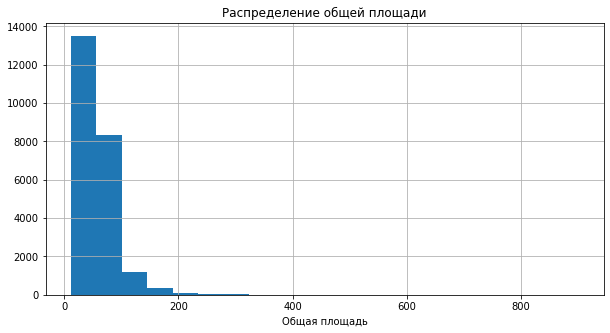

In [36]:
describe_data(data, 'total_area')
build_hist(data['total_area'], 'Общая площадь', 'Распределение общей площади')

Количество пропусков: 1898
Параметры: count    21752.00
mean        34.45
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64


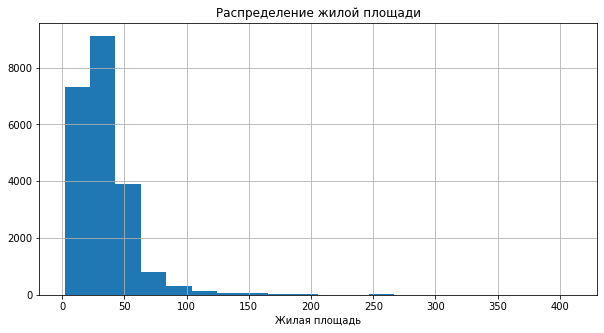

In [37]:
describe_data(data, 'living_area')
build_hist(data['living_area'], 'Жилая площадь', 'Распределение жилой площади')

Количество пропусков: 2269
Параметры: count    21381.00
mean        10.57
std          5.90
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64


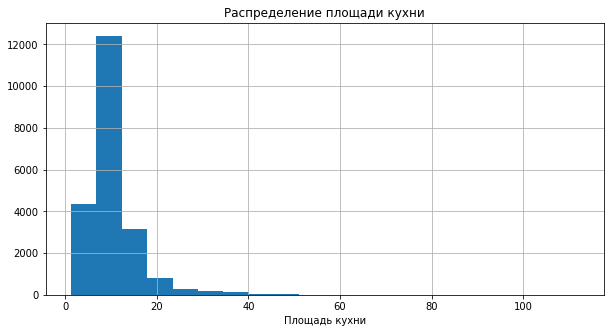

In [38]:
describe_data(data, 'kitchen_area')
build_hist(data['kitchen_area'], 'Площадь кухни', 'Распределение площади кухни')

**Проверим, нет ли таких квартир, в которых жилая площадь и площадь кухни больше общей площади:**

In [39]:
data['diff'] = data['total_area'] - data['living_area'] - data['kitchen_area'] # Добавляем новый столбец
display(sum(data['diff'] < 0)) # Считаем количество объявлений, в которых общая площадь меньше суммы жилой и кухонной площадей
data = data[data['diff'] > 0] # Удаляем эти объявления
data = data.drop('diff', axis=1) # Удаляем добавленный столбец

67

**Также изучим выделяющиеся на графике потенциально аномально редкие значения площади выше 400 квадратных метров:**

In [40]:
data[data['total_area'] > 400]

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
660,Санкт-Петербург,7,49950000,103223.81,483.9,312.5,26.4,3,4,6.0,другой,False,False,False,3.20,0,1.0,23.0,3.0,461.0,3.0,22.0,2017-10-04,2,10,2017,391.0
4237,Санкт-Петербург,7,50000000,96711.80,517.0,332.0,22.0,1,3,4.0,другой,False,False,False,NaN,0,2.0,23.0,2.0,477.0,2.0,540.0,2017-10-14,5,10,2017,NaN
5358,Санкт-Петербург,15,65000000,110169.49,590.0,409.0,100.0,20,3,6.0,другой,False,False,False,3.50,0,5.0,24.0,1.0,767.0,0.0,NaN,2019-02-14,3,2,2019,14.0
6221,Санкт-Петербург,4,34000000,72294.28,470.3,248.7,40.0,8,3,3.0,последний,False,False,False,NaN,0,15.0,44.0,1.0,852.0,3.0,122.0,2018-01-14,6,1,2018,179.0
6621,Санкт-Петербург,5,99000000,202868.85,488.0,216.0,50.0,20,17,20.0,другой,False,False,False,2.95,0,5.0,28.0,1.0,646.0,1.0,368.0,2017-04-09,6,4,2017,351.0
8018,Санкт-Петербург,5,84000000,165680.47,507.0,301.5,45.5,20,7,7.0,последний,True,False,False,4.45,1,6.0,NaN,2.0,110.0,0.0,NaN,2015-12-17,3,12,2015,1078.0
12401,Санкт-Петербург,7,91500000,184848.48,495.0,347.5,25.0,20,7,7.0,последний,False,False,False,4.65,0,6.0,NaN,2.0,110.0,0.0,NaN,2017-06-19,0,6,2017,14.0
12859,Санкт-Петербург,7,140000000,221799.75,631.2,322.3,19.5,20,4,4.0,последний,False,False,False,3.90,1,5.0,26.0,0.0,NaN,2.0,210.0,2019-04-09,1,4,2019,NaN
13749,Санкт-Петербург,6,240000000,585365.85,410.0,218.0,40.0,7,7,7.0,последний,False,False,False,3.40,0,5.0,32.0,0.0,NaN,2.0,198.0,2017-04-01,5,4,2017,199.0
14088,Санкт-Петербург,6,51000000,126865.67,402.0,300.0,56.0,8,6,8.0,другой,False,False,False,3.15,2,5.0,24.0,1.0,253.0,0.0,NaN,2017-02-07,1,2,2017,32.0


**За вычетом пары квартир стоимостью в 20 и 34 миллиона выглядит как стандартный рынок элитного жилья. К тому же, удаление данных объявлений из рассмотрения навряд ли сыграет какую-то решающую роль, поэтому оставим их.**

- Цена квартиры

Количество пропусков: 0
Параметры: count    2.081400e+04
mean     6.510990e+06
std      9.620021e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64


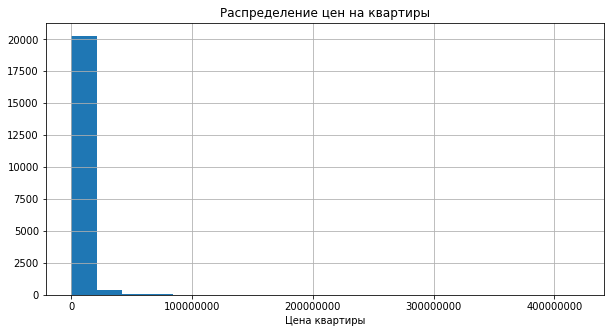

In [41]:
describe_data(data, 'last_price')
build_hist(data['last_price'], 'Цена квартиры', 'Распределение цен на квартиры')

**Большинство значений находится в пределах 7 миллионов рублей. При этом, наименьшее значение — 12 тысяч, наибольшее — 420 миллионов рублей. Наибольшее значение здесь  Изучим подробнее эти значения:**

In [42]:
data[data['last_price'] < 100000] # Найдём квартиры дешевле ста тысяч рублей

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
8793,Санкт-Петербург,2,12190,111.83,109.0,32.0,40.5,7,25,25.0,последний,False,False,False,2.75,0,9.0,36.0,1.0,805.0,0.0,NaN,2019-03-20,2,3,2019,8.0


**Вероятнее всего, значение ошибочно указано в тысячах вместо миллионов, поэтому исправим его:**

In [43]:
data['last_price'] = data['last_price'].replace(12190, 12190000)
data['last_price'] = data['last_price'].replace(111.83, 111834.86)

- Высота потолков

Количество пропусков: 7571
Параметры: count    13243.00
mean         2.75
std          0.87
min          1.00
25%          2.51
50%          2.65
75%          2.80
max         32.00
Name: ceiling_height, dtype: float64


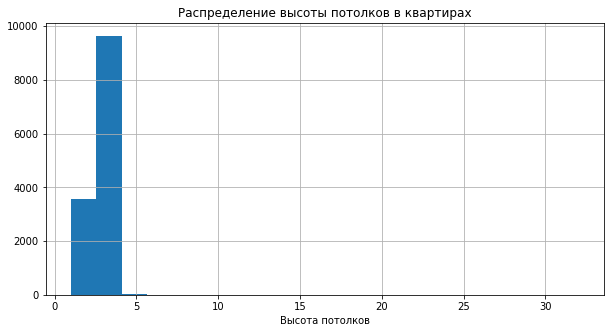

In [44]:
describe_data(data, 'ceiling_height')
build_hist(data['ceiling_height'], 'Высота потолков', 'Распределение высоты потолков в квартирах')

**Изучим маловероятные значения высоты (больше 5 и меньше 2 метров):**

In [45]:
data[data['ceiling_height'] > 5] 

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
464,Санкт-Петербург,6,66571000,237499.11,280.3,159.5,21.1,15,7,8.0,другой,False,False,False,5.2,0,7.0,26.0,3.0,187.0,1.0,616.0,2015-06-11,3,6,2015,578.0
1026,Санкт-Петербург,5,155000000,500000.00,310.0,190.0,63.0,20,3,3.0,последний,False,False,False,5.3,2,5.0,25.0,0.0,NaN,1.0,603.0,2018-10-12,4,10,2018,NaN
3148,Волхов,3,2900000,38666.67,75.0,53.0,8.0,14,2,3.0,другой,False,False,False,32.0,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-12,0,11,2018,NaN
3474,деревня Нурма,1,1400000,46666.67,30.0,15.3,7.3,3,2,5.0,другой,False,False,False,8.0,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-16,4,3,2018,125.0
4643,Санкт-Петербург,2,4300000,95555.56,45.0,30.0,7.0,0,2,9.0,другой,False,False,False,25.0,1,13.0,12.0,1.0,658.0,1.0,331.0,2018-02-01,3,2,2018,181.0
5076,Санкт-Петербург,1,3850000,126229.51,30.5,19.5,5.5,0,1,5.0,первый,True,False,False,24.0,0,8.0,30.0,3.0,397.0,1.0,578.0,2018-10-03,2,10,2018,7.0
5246,деревня Мины,2,2500000,46296.30,54.0,30.0,9.0,0,3,5.0,другой,False,False,False,27.0,2,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-13,4,10,2017,540.0
5669,Санкт-Петербург,2,4400000,88000.00,50.0,21.3,7.0,4,3,9.0,другой,False,False,False,26.0,2,11.0,29.0,1.0,305.0,0.0,NaN,2017-08-08,1,8,2017,267.0
5807,Санкт-Петербург,2,8150000,101875.00,80.0,41.0,12.0,17,13,36.0,другой,False,False,False,27.0,5,20.0,19.0,0.0,NaN,3.0,80.0,2019-01-09,2,1,2019,38.0
5863,Санкт-Петербург,1,5650000,125555.56,45.0,19.3,8.3,20,14,16.0,другой,False,False,False,8.3,1,11.0,13.0,0.0,NaN,1.0,613.0,2018-08-15,2,8,2018,14.0


**В высоту потолков от 6 до 14 метров поверить сложно, но таких строк в массиве всего пять, поэтому избавимся от них. А вот значения от 20 метров и выше выглядят аномальными, уменьшим их в десять раз:**

In [46]:
# Удаляем строки с потолками от 6 до 14 метров:
data = data[(data['ceiling_height'] != 6) & (data['ceiling_height'] != 8) & (data['ceiling_height'] != 8.3) & (data['ceiling_height'] != 14)]
# Уменьшаем в 10 раз значения высоты от 20 метров и больше:
data.loc[data['ceiling_height'] >= 20, ['ceiling_height']] *= 0.1 
# Проверяем корректность внесённых изменений:
data[data['ceiling_height'] > 5] 

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
464,Санкт-Петербург,6,66571000,237499.11,280.3,159.5,21.1,15,7,8.0,другой,False,False,False,5.2,0,7.0,26.0,3.0,187.0,1.0,616.0,2015-06-11,3,6,2015,578.0
1026,Санкт-Петербург,5,155000000,500000.00,310.0,190.0,63.0,20,3,3.0,последний,False,False,False,5.3,2,5.0,25.0,0.0,NaN,1.0,603.0,2018-10-12,4,10,2018,NaN
7578,Санкт-Петербург,3,38000000,265734.27,143.0,83.0,29.0,17,5,5.0,последний,False,False,False,5.5,1,6.0,26.0,3.0,479.0,0.0,NaN,2017-11-02,3,11,2017,NaN


**Теперь посмотрим на значения меньше двух метров:**

In [47]:
data[data['ceiling_height'] < 2] 

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
5712,поселок Мга,2,1500000,35046.73,42.8,27.5,5.20,5,1,2.0,первый,False,False,False,1.20,0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-14,0,8,2017,248.0
16934,Санкт-Петербург,1,4100000,102500.00,40.0,17.4,8.34,5,5,37.0,другой,False,False,False,1.75,0,20.0,19.0,0.0,NaN,3.0,80.0,2017-10-17,1,10,2017,71.0
22590,Санкт-Петербург,2,6000000,109090.91,55.0,32.4,10.00,16,7,12.0,другой,False,False,False,1.00,0,14.0,33.0,2.0,293.0,2.0,289.0,2018-10-31,2,10,2018,13.0


**Таких строк всего 3, поэтому можем их удалить:**

In [48]:
data = data[(data['ceiling_height'] != 1.00) & (data['ceiling_height'] != 1.20) & (data['ceiling_height'] != 1.75)]

**Наконец, заполним пропуски в данном столбце медианным значением:**

In [49]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # Производим замену пропущенных значений
data['ceiling_height'].isna().sum() # Проверяем, что количество пропусков стало равно нулю

0

Количество пропусков: 0
Параметры: count    20806.00
mean         2.70
std          0.22
min          2.00
25%          2.60
50%          2.65
75%          2.70
max          5.50
Name: ceiling_height, dtype: float64


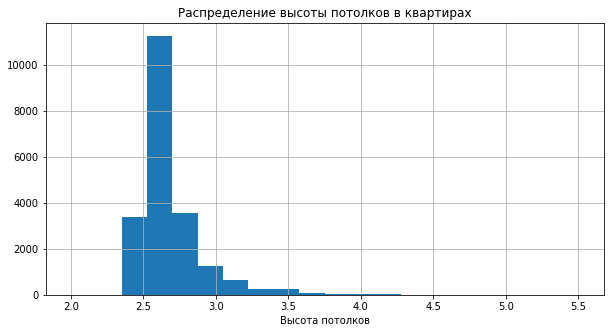

In [50]:
describe_data(data, 'ceiling_height') # Ещё раз описываем основные параметры
build_hist(data['ceiling_height'], 'Высота потолков', 'Распределение высоты потолков в квартирах') # Перестраиваем гистограмму

- Количество этажей

Количество пропусков: 38
Параметры: count    20768.00
mean        10.55
std          6.51
min          1.00
25%          5.00
50%          9.00
75%         15.00
max         60.00
Name: floors_total, dtype: float64


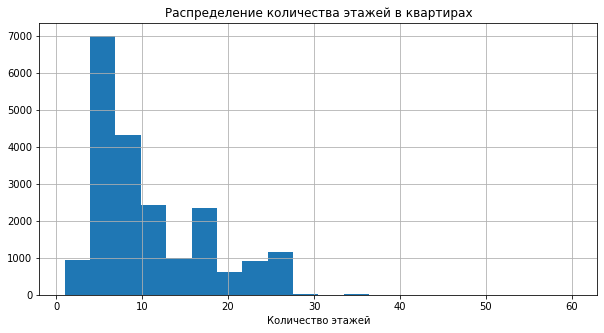

In [51]:
describe_data(data, 'floors_total')
build_hist(data['floors_total'], 'Количество этажей', 'Распределение количества этажей в квартирах')

In [52]:
data[data['floors_total'] > 40] # Проверим количество объявлений с количеством этажей больше 40

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
2253,Кронштадт,2,3800000,83516.48,45.5,27.4,7.4,12,4,60.0,другой,False,False,False,2.88,0,49.0,68.0,2.0,342.0,3.0,614.0,2018-06-28,3,6,2018,166.0
16731,Санкт-Петербург,1,3978000,99450.00,40.0,10.5,14.0,9,18,52.0,другой,False,False,False,2.65,0,13.0,21.0,1.0,793.0,0.0,NaN,2018-09-24,0,9,2018,45.0


In [53]:
data = data[(data['floors_total'] != 52.0) & (data['floors_total'] != 60.0)] # Удаляем строки с аномальными значениями

- Расстояния до центра города и парка

Количество пропусков: 4597
Параметры: count    16207.00
mean        14.24
std          8.67
min          0.00
25%          9.00
50%         13.00
75%         16.00
max         66.00
Name: city_centers_nearest_km, dtype: float64


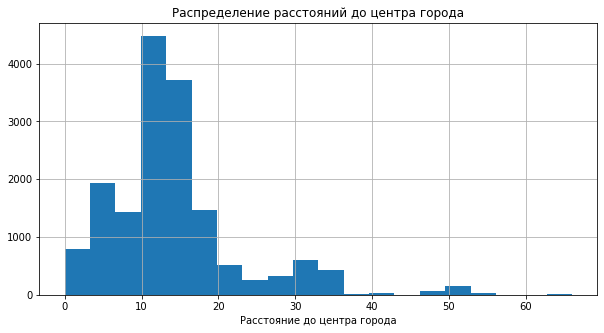

In [54]:
describe_data(data, 'city_centers_nearest_km')
build_hist(data['city_centers_nearest_km'], 'Расстояние до центра города', 'Распределение расстояний до центра города')

**Максимальное и минимальное расстояния не выглядят какими-то аномальными, выбросов в данных также не наблюдается, поэтому оставим всё как есть.**

Количество пропусков: 13594
Параметры: count    7210.00
mean      488.25
std       337.47
min         1.00
25%       288.00
50%       454.00
75%       611.00
max      3190.00
Name: parks_nearest_m, dtype: float64


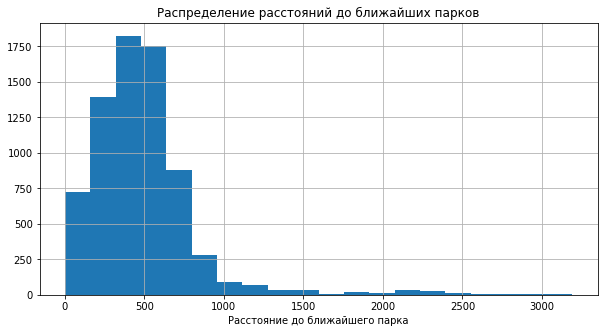

In [55]:
describe_data(data, 'parks_nearest_m')
build_hist(data['parks_nearest_m'], 'Расстояние до ближайшего парка', 'Распределение расстояний до ближайших парков')

**Максимальное расстояние так же не выглядит каким-то особенным, а вот минимальное в 1 метр выглядит странно. Наиболее адекватным выглядит минимальное расстояние хотя бы в 10 метров, поэтому изучим строки, в которых это условие не выполняется:**

In [56]:
data[data['parks_nearest_m'] < 10]

,location,rooms,last_price,price_per_m2,total_area,living_area,kitchen_area,total_images,floor,floors_total,floor_type,apartment,studio,open_plan,ceiling_height,balcony,city_centers_nearest_km,airports_nearest_km,parks_around_3km,parks_nearest_m,ponds_around_3km,ponds_nearest_m,exposition_first_day,exposition_weekday,exposition_month,exposition_year,exposition_days
2527,Кронштадт,2,4690000,77777.78,60.3,28.00,7.9,8,2,5.0,другой,False,False,False,2.50,0,52.0,70.0,3.0,9.0,3.0,345.0,2016-03-05,5,3,2016,146.0
9344,Санкт-Петербург,1,3000000,106761.57,28.1,17.00,5.6,12,1,9.0,первый,False,False,False,2.50,0,12.0,12.0,1.0,7.0,1.0,780.0,2017-07-25,1,7,2017,440.0
11949,Санкт-Петербург,2,4500000,102272.73,44.0,30.00,7.0,7,7,9.0,другой,False,False,False,2.60,0,12.0,12.0,1.0,3.0,1.0,508.0,2017-11-24,4,11,2017,82.0
14624,Санкт-Петербург,2,3770000,83039.65,45.4,28.43,6.9,8,2,9.0,другой,False,False,False,2.65,0,16.0,44.0,1.0,1.0,0.0,NaN,2019-03-20,2,3,2019,42.0


**Таких строк всего 4, однако удалять их только из-за данных значений не хочется. Заполним значения в исследуемом столбце расстоянием в 10 метров:**

In [57]:
data.loc[data['parks_nearest_m'] < 10, ['parks_nearest_m']] = 10 

**4.2. Выбросы изучены и обработаны, а, значит, можно приступать к исследовательскому анализу. Сперва ответим на вопрос "Как быстро продавались квартиры?" и разберёмся с тем, какие продажи можно считать быстрыми, а какие — долгими. Для ответа на этот вопрос сперва ознакомимся более детально с данными и построим гистограмму:**

Количество пропусков: 2874
Параметры: count    17930.00
mean       185.80
std        222.19
min          1.00
25%         45.00
50%        102.00
75%        239.00
max       1580.00
Name: exposition_days, dtype: float64


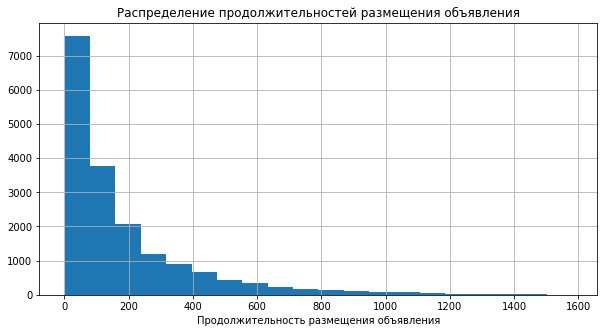

In [58]:
describe_data(data, 'exposition_days')
build_hist(data['exposition_days'], 'Продолжительность размещения объявления', 'Распределение продолжительностей размещения объявления')

In [59]:
data['exposition_days'].median()

102.0

**Попробуем оценить "быстрые" и "долгие" продажи при помощи диаграммы размаха: 

<AxesSubplot:xlabel='exposition_days'>

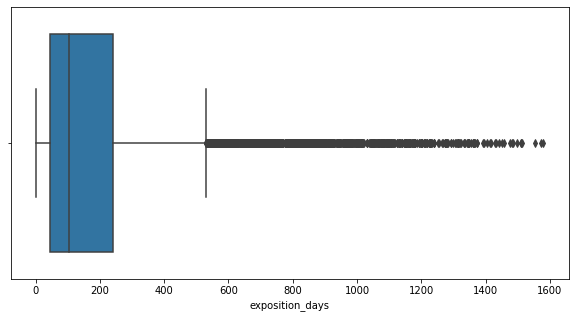

In [60]:
plt.figure(figsize=(10, 5))
sb.boxplot(x='exposition_days', data=data) # Cтроим диаграмму размаха для оценки сверхбыстрых/-долгих продажи

**Согласно данной диаграмме к быстрым продажам мы можем отнести все объявления, время публикации которых не превышает 45 дней, а к долгим — продолжительностью более 239 дней (для красоты округлим до 240)**

**4.3. Определим влияние различных факторов на цену объекта. Для этого в первую очередь построим тепловую карту корреляции по столбцу *last_price*:**

Text(0.5, 1.0, 'Тепловая карта корреляции стоимости квартиры')

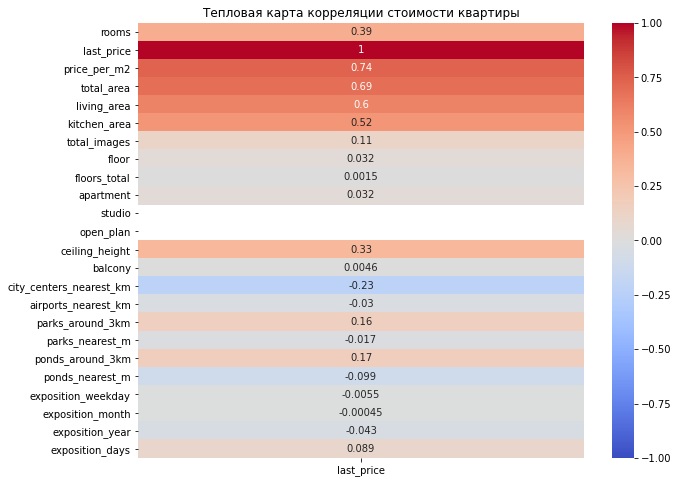

In [63]:
plt.figure(figsize = (10, 8))
sb.heatmap(data.corr()[['last_price']], annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Тепловая карта корреляции стоимости квартиры')

**По данной визуализации хорошо видно, что наибольшее влияние на цену квартиры оказывают количество комнат и общая площадь квартиры (а также — связанные с ней жилая площадь и площадь кухни).**

<Figure size 1080x360 with 0 Axes>

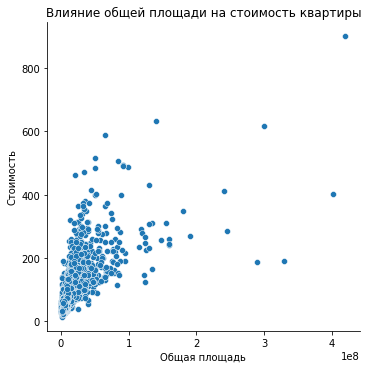

In [76]:
plt.figure(figsize = (15, 5))
sb.relplot(x='last_price', y='total_area', data=data)
plt.title('Влияние общей площади на стоимость квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость')
plt.show()

<Figure size 1080x360 with 0 Axes>

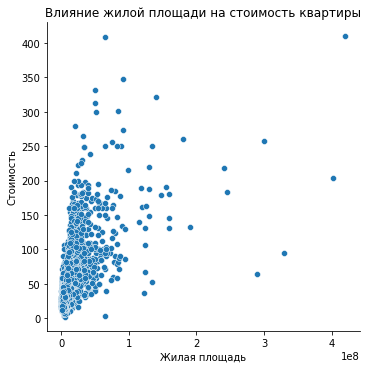

In [75]:
plt.figure(figsize = (15, 5))
sb.relplot(x='last_price', y='living_area', data=data)
plt.title('Влияние жилой площади на стоимость квартиры')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.show()

<Figure size 1080x360 with 0 Axes>

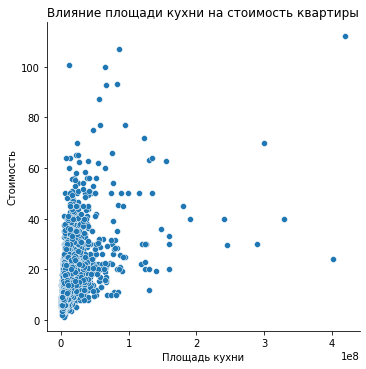

In [77]:
plt.figure(figsize = (15, 5))
sb.relplot(x='last_price', y='kitchen_area', data=data)
plt.title('Влияние площади кухни на стоимость квартиры')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость')
plt.show()

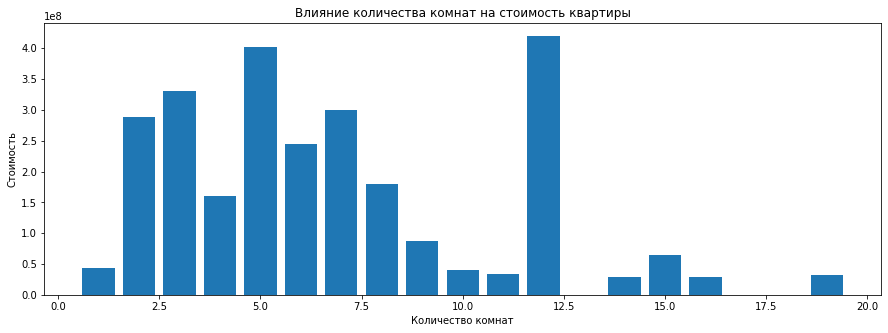

In [67]:
plt.figure(figsize = (15, 5))
plt.bar(data['rooms'], data['last_price'])
plt.title('Влияние количества комнат на стоимость квартиры')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()

**Какой-то очевидной зависимости стоимости квартиры от этажа по тепловой карте не просматривается, поэтому изучим медианные значения стоимости от типа этажа:**

In [68]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

,last_price
floor_type,
другой,4900000
первый,3950000
последний,4350000


**Можем заключить, что квартиры на первом этаже, как правило, дешевле других.**
**Остаётся проверить зависимость стоимости от дня недели, месяца и года публикации объявления:**

Text(0, 0.5, 'Стоимость')

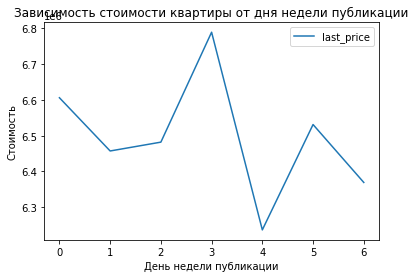

In [69]:
data.pivot_table(index='exposition_weekday', values='last_price', aggfunc='mean').plot()
plt.title('Зависимость стоимости квартиры от дня недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Стоимость')

Text(0, 0.5, 'Стоимость')

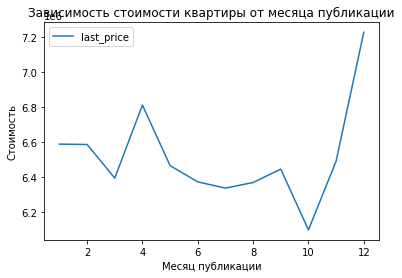

In [70]:
data.pivot_table(index='exposition_month', values='last_price', aggfunc='mean').plot()
plt.title('Зависимость стоимости квартиры от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Стоимость')

Text(0, 0.5, 'Стоимость')

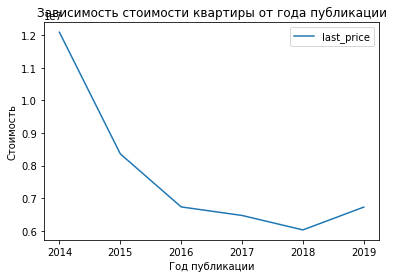

In [71]:
data.pivot_table(index='exposition_year', values='last_price', aggfunc='mean').plot()
plt.title('Зависимость стоимости квартиры от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Стоимость')

**Вывод:**
- Наибольшее влияние на стоимость квартиры оказывают такие параметры как количество комнат и её общая площадь (а также связанные с ней жилая и кухонная площади). Зависимость условно близка к линейной, так что можно сказать, что чем больше площадь/количество комнат — тем выше стоимость квартиры.
- Корреляция с этажом менее явная, однако можно заключить, что квартиры на первом этаже, как правило, дешевле других.
- Стоимость квартир снижалась в период с 2014 по 2018 год, после чего начала расти.
- На протяжении года наблюдается постепенное снижение цены в летне-осеннем периоде, после чего происходит значительный рост ближе к декабрю.
- Сложно заметить какую-то однозначную корреляцию с днями недели, но можно сказать, что в среднем стоимость объявлений, размещённых в начале недели, была выше, чем стоимость объявлений, размещённых ближе к выходным.

**4.4. Изучим топ-10 населённых пунктов по числу объявлений:**

In [72]:
top_location = data['location'].value_counts().head(10)
location_price = data.pivot_table(index='location', values='price_per_m2')
top_10 = location_price.merge(top_location,  how='right', left_index=True, right_index=True)
top_10.sort_values(by='price_per_m2', ascending=False)

,price_per_m2,location
Санкт-Петербург,113746.061378,13989
Пушкин,103291.299110,337
деревня Кудрово,92143.850446,224
поселок Парголово,90711.636934,287
поселок Мурино,85153.350353,425
поселок Шушары,78530.275204,392
Колпино,75284.436729,321
Всеволожск,68921.351652,351
Гатчина,68505.876783,286
Выборг,58507.031862,188


**Ожидаемо, самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге — порядка 114 тысяч за квадратный метр. Самая низкая — в Выборге: 58,5 тысяч.**

**4.5. На примере Санкт-Петербурга найдём влияние удалённости от центра города на цену квартиры.**

In [73]:
spb_data = (data[data['location'] == 'Санкт-Петербург'] #Создаём сводную таблицу зависимости цены от расстояния
                .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')) # до центра города
spb_data

,last_price
city_centers_nearest_km,
0.0,3.257505e+07
1.0,2.152436e+07
2.0,1.824780e+07
3.0,1.104289e+07
4.0,1.191799e+07
5.0,1.380375e+07
6.0,1.471035e+07
7.0,1.452388e+07
8.0,1.028228e+07


Text(0, 0.5, 'Стоимость')

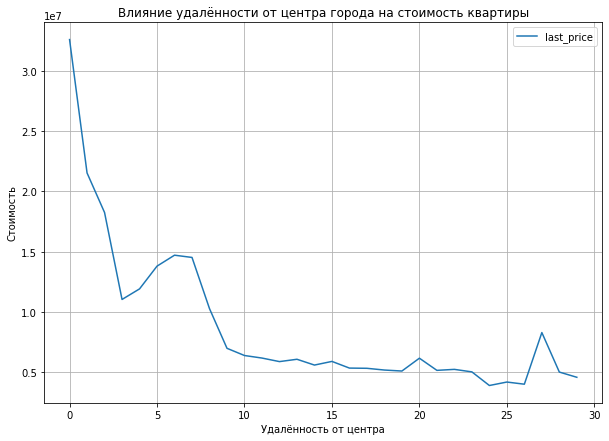

In [74]:
spb_data.plot(figsize=(10,7), grid=True) # Строим график по сводной таблице
plt.title('Влияние удалённости от центра города на стоимость квартиры')
plt.xlabel('Удалённость от центра')
plt.ylabel('Стоимость')

**За вычетом отдельных скачков на графике однозначно просматривается тенденция к уменьшению цены за квадратный метр при удалении от центра.**

### Общий вывод

**Основной целью данного анализа было изучение влияния различных параметров на стоимость квартир, опубликованных в сервисе Яндекс.Недвижимость. Ключевые выводы, полученные в результате данного анализа:**
- Наибольшее влияние на цену квартиры оказывают такие параметры как количество комнат и её общая площадь (и связанные с ней кухонная и жилая площади). Зависимость условно близка к линейной, так что можно сказать, что чем больше площадь/количество комнат — тем выше стоимость квартиры.
- Также немаловажна удалённость квартиры от центра. На примере Санкт-Петербурга выяснили, что средняя цена на квартиру уменьшается с удалением от центра города.
- В период с 2014 по 2018 год стоимость квартир падала. После — стала расти.
- На протяжении года наблюдается постепенное снижение цены в летне-осеннем периоде, после чего происходит значительный рост ближе к декабрю.
- В среднем, стоимость объявлений, размещённых в начале недели, была выше, чем стоимость объявлений, размещённых ближе к выходным.
- Квартиры на первом этаже, как правило, дешевле других.
- Самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге — порядка 114 тысяч за квадратный метр. Самая низкая — в Выборге: 58,5 тысяч.
- Среднее время продажи квартиры составляет порядка 185 дней, а медианное — 102 дня. При этом к необычайно долгим продажам мы отнесли объявления, с момента публикации и до закрытия которых прошло более 240 дней, а к необычайно быстрым — те, продолжительность которых составляла не более 45 дней. 

**Для получения данных выводов были обработаны пропуски, дубликаты и аномалии (редкие и выбивающиеся значения) в данных; типы данных в отдельных столбцах были изменены для улучшения качества анализа. Также в исходную таблицу были добавлены новые столбцы, а старые — переименованы и реструктурированы.**